# Proyecto integrador 1

## 1. Preparación de los datos

Los datos tienen que ser procesados antes de realizar un análisis. En esta sección se buscará datos ausentes, se revisaran los datos y los títulos del DataFrame

In [1]:
# Importación de librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

C:\Users\juan_\AppData\Local\Temp\ipykernel_31692\3422984404.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Se hace una revisión de los datos. Para esto se hace uso del método `csample()` para ver un poco del contenido de la tabla, también se hace uso de `info()` para buscar datos ausentes.

In [2]:
# Leemos el dataframe
df = pd.read_csv('datasets/games.csv')
# Se muestra una muestra del df
display(df.sample(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11711,Puchi Puchi Virus,DS,2007.0,Puzzle,0.07,0.00,0.00,0.01,73.0,4.2,E
15620,TV Anime Idolm@ster: Cinderella Girls G4U! Pac...,PS3,2016.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9178,Odin Sphere: Leifthrasir,PSV,2016.0,Role-Playing,0.02,0.02,0.09,0.01,93.0,7.9,T
3438,The Lord of the Rings: The Third Age,PS2,2004.0,Role-Playing,0.49,0.02,0.00,0.08,73.0,8.2,T
1068,Resident Evil 4,GC,2005.0,Action,0.98,0.42,0.22,0.06,96.0,9.4,M
4580,ESPN NHL 2K5,XB,2004.0,Sports,0.32,0.09,0.00,0.02,88.0,8.5,E
5804,40 Winks,PS,1999.0,Platform,0.17,0.12,0.00,0.02,NaN,NaN,NaN
10726,Dragon Ball: Evolution,PSP,2009.0,Fighting,0.09,0.00,0.00,0.01,28.0,0.9,T
6271,Dragon Ball GT: Final Bout,PS,1997.0,Fighting,0.02,0.02,0.22,0.02,NaN,NaN,NaN
15021,Assault Suit Leynos,PS4,2016.0,Shooter,0.02,0.00,0.00,0.00,67.0,tbd,E10+


In [3]:
# Método info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Se buscan valores duplicados
display(df[df.duplicated()].sum())

Name                 0
Platform             0
Year_of_Release    0.0
Genre                0
NA_sales           0.0
EU_sales           0.0
JP_sales           0.0
Other_sales        0.0
Critic_Score       0.0
User_Score           0
Rating               0
dtype: object

Hallazgos:

* Los encabezados de la tabla están escritos con mayúsculas y minúsculas, por lo que se cambiara todo a minúsculas.
* Las columnas `year_of_release` y `critic_score` contienen datos de tipo flotante, pero en realidad deben ser enteros. `user_score` tiene datos de tipo `object` y en realidad debe ser un flotante. Este tipo de datos deben ser cambiados.
* Hay columnas que contienen datos ausentes, estos deben ser tratados. Más adelante se dará una explicación sobre que se hará con estos valores.
* `user_score` contiene datos que tienen la abreviación "tbd", este valor debe ser cambiado por uno de tipo flotante.
* No hay datos duplicados

In [5]:
# Cambiar los encabezados a minúsculas
df.columns = map(str.lower, df.columns)
display(df.sample())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6893,Spider-Man: Shattered Dimensions,Wii,2010.0,Action,0.12,0.09,0.0,0.02,75.0,7.7,T


Procesar los datos:
* Los valores ausentes de las columnas `name` y `genre` se dejará el espacio vacío porque sólo faltan dos registros. Probablemente faltan porque hubo un problema al transcribir los datos.

In [6]:
# Cambia los valores ausentes de name y genre
df['name'] = df['name'].fillna("")
df['genre'] = df['genre'].fillna("")

# Se combrueba que ya no hay valores vacíos
print(df['name'].isna().sum())
print(df['genre'].isna().sum())

0
0


* Para la columna `year_of_release` los valores ausentes probablemente sean resultado de información que se deconoce o por un error al transcribir los datos. Sin embargo, se decide dejar los valores ausentes porque representan alrededor del 1% de los datos y si se tiene que hacer algún análisis de acuerdo al año, sólo se tendrán fuera de dicho análisis. Lo que si se va a cambiar es el tipo de datos por enteros, porque los años se manejan como números enteros.

In [7]:
# Se cambia el tipo de datos
df['year_of_release'] = df['year_of_release'].astype('Int64')
# Se comprueba el tipo de datos
print(df['year_of_release'].dtype)

Int64


* Los valores ausentes en `critic_score` y `user_score`, es muy probable que se deban porque aún no tienen una calificación por la crítica ni por los usuarios. En `critic_score` se observó que hay aproximadamente 50% de datos ausentes y en `user_score` hay alrededor del 40%, además en esta última hay vaores que tienen `"tbd"`, por lo que el número de valores ausentes puede crecer considerablemente. Al ser columnas cuantitativas es muy probable que se realizarán cálculos numéricos con los datos y cambiar esta cantidad de valores ausentes por la media o mediana correspondiente de cada columna puede resultar que los valores queden muy sesgados. Debido a esto se decide dejar los valores ausentes en las dos columnas y cambiar los valores de `"tbd"` por valores nulos, esto con el fin de evitar tener strings en la columna. Sin embargo si se cambiará el tipo de datos de cada columna.

In [8]:
# Columna critic_score

# Cambia el tipo de datos a entero
df['critic_score'] = df['critic_score'].astype('Int64')
# Se comprueba el tipo de datos
print(df['critic_score'].dtype)

Int64


In [9]:
# Columna user_score

# Quita los 'tbd' que hay y los convierte en NaN
df['user_score'] = df['user_score'].replace('tbd', float('nan'))

# Cambia el tipo de datos
df['user_score'] = df['user_score'].astype('float')
# Se comprueba el tipo de datos
print(df['user_score'].dtype)

float64


* La columna `rating` tiene el 40% de datos ausentes, probablemente porque aún no se tiene un rating del juego en cuestión. Contemplando esto, sólo se cambiarán los valores ausentes por `"no rating"` para representar que no se tiene el rating y no dejarlo como un valor ausente   

In [10]:
# cambia los valores ausentes por "no rating"
df['rating'] = df['rating'].fillna('no rating')

# Comprobamos que ya no hay valores ausentes
print(df['rating'].isna().sum())

0


Por último se agreagrá un columna que contenga las ventas totales de todas las regiones. Con el fin de realizar cálculos posteriores con mayor facilidad.

In [11]:
# Agrega la columna total_sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## 2. Análisis de datos

### 2.1 ¿Cuéntos juegos han salido por año?

Para responder a esta pregunta se consruirá un histograma y así observar el comportamiento a través de los años

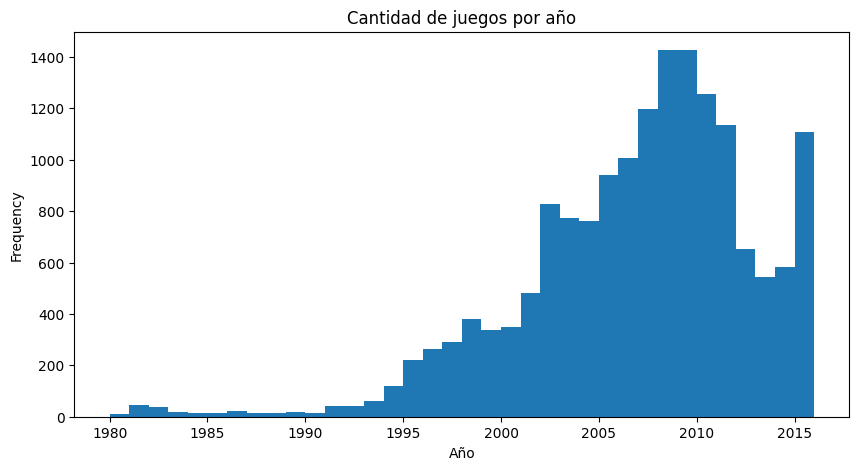

In [12]:
# Primero filtraremos el DF por los valores que no sean nulos en la columna, para evitar tomar estos datos
non_nan_year = df[~df['year_of_release'].isna()]

# Se crea la gráfica
non_nan_year['year_of_release'].plot(kind='hist', title='Cantidad de juegos por año', bins=36, figsize=(10,5))
plt.xlabel('Año')
plt.show()

Conclusiones:

Los juegos tuvieron un crecimiento de ventas a partir del año 1990, teniendo su auge antes del año 2010, con poco más de 1400 juegos lanzados. Sin embargo, hubo una baja en los años posteriores al 2010, llegando a un mínimo de casi 600 juegos lanzados.



### 

### 2.2 Análisis por plataforma

De todas las plataformas ¿Cuáles son las que tienen más ventas? Adicionalmete, analizaremos en que año comenzaron a vender juegos y cuanto tiempo llevan haciéndolo, si es que siguen haciendo juegos. Esto con el fin de que se pueda crear un modelo de predicción para el año 2017 y tomar sólo los datos de un periodo de tiempo; datos que son significativos.

Para lograr el análisis antes mencionado, primero se creará un df llamado `df_platforms` el cuál contendrá la información del total de ventas que ha tenido cada plataforma, el año registrado del primer juego lanzado y el último registrado de un juego lanzado. Con esto podremos saber la cantidad de ventas que ha tenido cada plataforma y si sigue vigente.

In [13]:
# Creación del DataFrame df_platforms
df_platforms = pd.pivot_table(df, index='platform', values=['year_of_release', 'total_sales'],
                              aggfunc={'year_of_release': ["min", "max"], 'total_sales': "sum"})

# Después de usar la función pivot_tables se creó un DF con dos nombres de columnas, con la siguiente línea se juntan esos nombres para hacer
# sólo un nombre
df_platforms.columns = df_platforms.columns.map('_'.join)

# Se resetea el index
df_platforms = df_platforms.reset_index()

# Se agrega la columna year_diff
df_platforms['year_diff'] = df_platforms['year_of_release_max'] - df_platforms['year_of_release_min']
display(df_platforms.head(10))

,platform,total_sales_sum,year_of_release_max,year_of_release_min,year_diff
0,2600,96.98,1989,1980,9
1,3DO,0.10,1995,1994,1
2,3DS,259.00,2016,2011,5
3,DC,15.95,2008,1998,10
4,DS,806.12,2013,1985,28
5,GB,255.46,2001,1988,13
6,GBA,317.85,2007,2000,7
7,GC,198.93,2007,2001,6
8,GEN,30.77,1994,1990,4
9,GG,0.04,1992,1992,0


Ya tenemos un DataFrame con los datos que se requerían, se va a ordenar de acuerdo a la columna `year_of_release_max` para saber cuáles son las plataformas que aún sigen sacando juegos, cuántos años llevan lanzando juegos y ver sus ventas totales. Para lograr esto, una vez ordenados los datos, se realizarán 3 gráficas:
1. Gráfica de acuerdo a las ventas totales que han tenido cada plataforma
2. Gráfica para ver visualmente cuando lanzó cada plataforma su último juego
3. Gráfica saber cuantos años estuvo vigente la plataforma o si es qué ya no hizo más juegos

In [14]:
df_platforms = df_platforms.sort_values(by='year_of_release_max', ascending=False)
display(df_platforms.head(20))

,platform,total_sales_sum,year_of_release_max,year_of_release_min,year_diff
30,XOne,159.32,2016,2013,3
2,3DS,259.00,2016,2011,5
28,X360,971.42,2016,2005,11
27,WiiU,82.19,2016,2012,4
26,Wii,907.51,2016,2006,10
20,PSV,54.07,2016,2011,5
13,PC,259.52,2016,1985,31
18,PS4,314.14,2016,2013,3
17,PS3,939.65,2016,2006,10
19,PSP,294.05,2015,2004,11


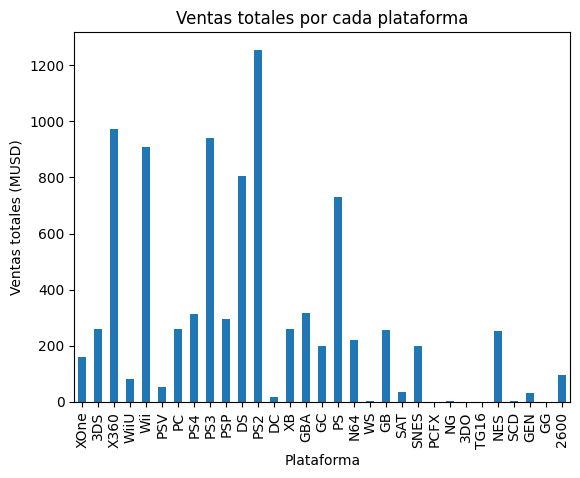

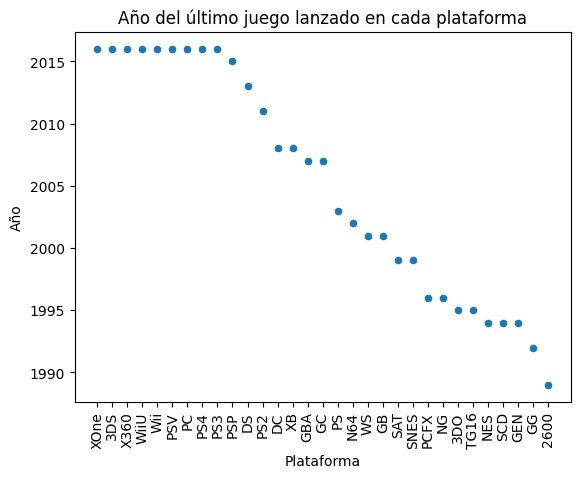

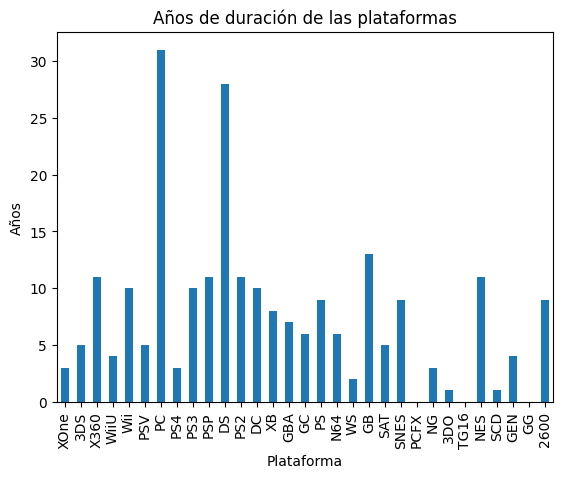

In [15]:
# Creación de la gráfica del total de ventas por plataforma a partir del DF ordenado
df_platforms.plot(kind='bar', x='platform', y='total_sales_sum', legend=None)
plt.title('Ventas totales por cada plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (MUSD)')

# Creación de un diagrama de dispersión para saber el último año en que se lanzó un juego
df_platforms.plot(kind='scatter', x='platform', y='year_of_release_max')
plt.title('Año del último juego lanzado en cada plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Año')
plt.xticks(rotation=90)

# Creación de una gráfica que indica cúantos años llevan o duraron las plataformas
df_platforms.plot(kind='bar', x='platform', y='year_diff', legend=None)
plt.title('Años de duración de las plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Años')

plt.show()

In [16]:
years_mean = df_platforms['year_diff'].mean()
print('El promedio de años en que una plataforma es vigente:', years_mean)

El promedio de años en que una plataforma es vigente: 7.612903225806452


Conclusiones:

Con el análisis anterior se pueden responder las siguientes preguntas.

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

El promedio de vida de las plataformas, contemplando las que aún siguen vigentes es de 7.6 años. Esto se puede ver en la gráfica de "Años de duración de las plataformas" donde la mayoría de las plataformas apenas superan los 10 años de duración. En la misma gráfica, con apoyo de la gráfica "Año del último juego lanzado en cada plataforma", se puede observar que las plataformas que siguen vigentes tienen entre 3 y 11 años, se puede decir que las plataformas que siguen vigentes pero tienes más de 8 años es probable que no tarden en dejar de ser vigentes, con la única excepción de la PC, la cuál lleva más de 30 años.

¿Qué plataformas son líderes en ventas?

Con la gráfica "Ventas totales por cada plataforma" podemos observar que las 5 plataformas con más ventas son: PS2, X360, PS3, Wii y DS. Dos de las anteriores son plataformas que ya no están vigentes, la PS2, que es líder en ventas, dejó de sacar juegos en 2011 y la DS dejó de sacar juegos en 2013.

### 2.3 Datos considerados como relevantes

Con las conclusiones anteriores se ha decidido reducir los datos a los juegos lanszados en los últimos 5 años de la tabla original, es decir, a partir del año 2012 para ver el comportamiento que se presenta. Se toma esta decisión porque después del año 2010 se disminuyó,de manera considerable, la venta de juegos, las plataformas duran un promedio de 7.6 años y como se observó de manera general, la plataforma líder en ventas ya no lanza más juegos.

Este nuevo DataFrame se llamará `last_5_years`

In [17]:
# Creación del DF last_5_years
last_5_years = df[df['year_of_release'] >= 2012 ]
display(last_5_years.head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no rating,14.63


### 2.4 Análisis de las ventas por plataforma

Con el nuevo DataFrame que se realizó, ¿cuál es la plataforma líder en ventas?, y ¿cuáles han tenido cambios conforme pasan los años?

Para  resolver esto se realizará un nuevo análisis, con el nuevo DataFrame, para las ventas totales y se realizará una gráfica para visualizar los resultados.

In [18]:
# Se agrupa por plataforma y por año
total_sales_df = last_5_years.groupby(['platform', 'year_of_release'])['total_sales'].sum()
display(total_sales_df.head(5))

platform  year_of_release
3DS       2012               51.36
          2013               56.57
          2014               43.76
          2015               27.78
          2016               15.14
Name: total_sales, dtype: float64

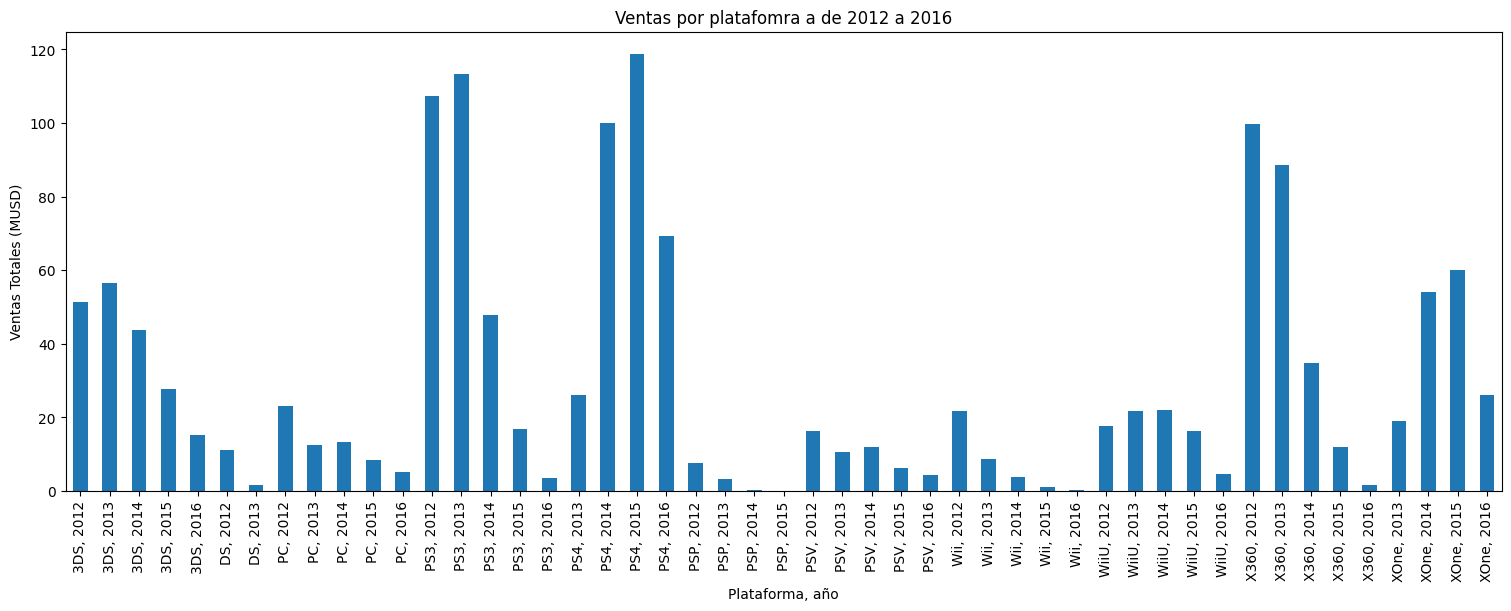

In [19]:
# Creación de una gráfica que indica las ventas totales de las plataformas a través de los años
fig, ax = plt.subplots(figsize=(15,6), layout='constrained')
total_sales_df.plot(kind='bar', legend=None, ax=ax)
labels = [label.get_text().replace('(', '').replace(')', '') for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('Plataforma, año')
ax.set_ylabel('Ventas Totales (MUSD)')
ax.set_title('Ventas por platafomra a de 2012 a 2016')
plt.show()

Colclusiones:

La PS4 es líder en ventas de juegos en los años 2015 y 2016, mientras que la PS3 es líder en ventas en 2012 y 2013.

Casi todas las plataformas presentan un decremento en las ventas de juegos conforma pasan los años a excepción de PS4 y XOne. Estas dos ultimas presentan un incremento de ventas a partir del año 2013 (año que salieron dichas plataformas), teniendo su pico más alto en 2015. Por lo que se puede decir que estas dos son las plataformas más rentables.

### 2.5 Creación de boxplots

Con la creación de bosplots se va a observar si son muy significativas las diferencias en las ventas y cómo se mueven las ventas promedio en las diferentes plataformas

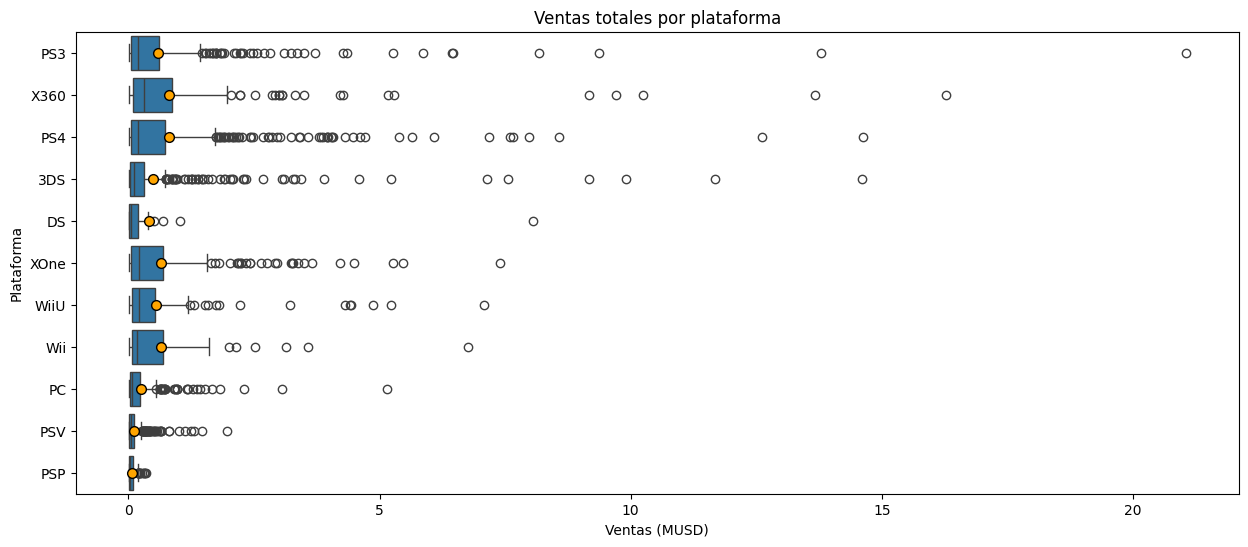

In [20]:
# Creación del boxplot de las diferentes plataformas colocando la media en un punto color naranja
plt.figure(figsize=(15,6))
sns.boxplot(x='total_sales', y='platform', data=last_5_years, showmeans=True, meanprops={"marker":"o",
                                                                                         "markerfacecolor":"orange",
                                                                                         "markersize":"7",
                                                                                         "markeredgecolor":"black"})
plt.title('Ventas totales por plataforma')
plt.xlabel('Ventas (MUSD)')
plt.ylabel('Plataforma')
plt.show()

Conclusiones:

Con el Boxplot podemos decir que hay demasiados valores atípicos en todas las plataformas, tal vez se deba a varios juegos en específico que tuvieron muchas ventas por razones que aún desconocemos pero podemos investigar. Una de las razones podría ser si la critica incitó a los usuarios a comprar más.

En el análisis anterior se dijo que PS4 y XOne son las 2 plataformas que presentaban un incremento en las ventas de juegos. Aquí se observa que ambas plataformas tienen un IQR similiar, además en la media (punto naranja) de las plataformas no existe una diferencia significativa. Lo mismo se puede decir de las plataformas X360, PS3 y Wii. Lo que crea la diferencia de ventas entre cada plataforma son los valores atípicos.

### 2.6 ¿Las reseñas de los usuarios y de los profesionales afectan las ventas?

Con el fin de poder determinar si las reseñas afectan las ventas de juegos, tenemos que analizar las calificaciones que tienen las críticas tanto hechas por usuarios como los profesionales y si esto hace que se venda más un juego o no. Se tomará la PS4 como referencia, ya que es la que es líder en ventas y tiene muchos valores atípicos

In [21]:
# Creación de un DF con valores que solo tiene juegos en la plataforma de PS4
PS4_df = last_5_years[df['platform'] == 'PS4']
display(PS4_df.head(5))

C:\Users\juan_\AppData\Local\Temp\ipykernel_31692\274262067.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  PS4_df = last_5_years[df['platform'] == 'PS4']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,no rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


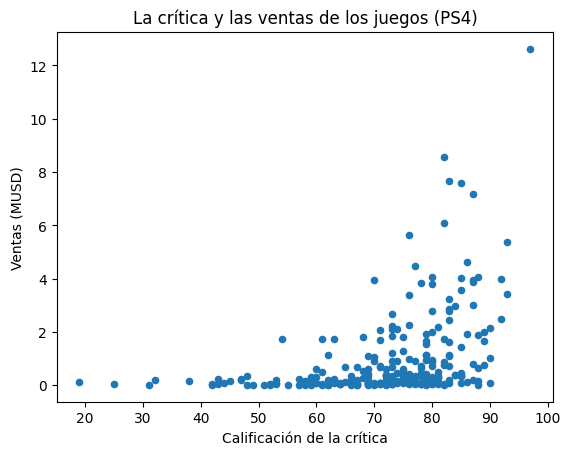

El coeficiente de correlación es de:
0.40656790206178095


In [22]:
# Creación del diagrama de dispersión con valores de la crítica de los profesionales
PS4_df.plot(x='critic_score', y='total_sales', kind='scatter', title='La crítica y las ventas de los juegos (PS4)')
plt.xlabel('Calificación de la crítica')
plt.ylabel('Ventas (MUSD)')
plt.show()

# Coeficiente de correlación
print('El coeficiente de correlación es de:')
print(PS4_df['critic_score'].corr(PS4_df['total_sales']))

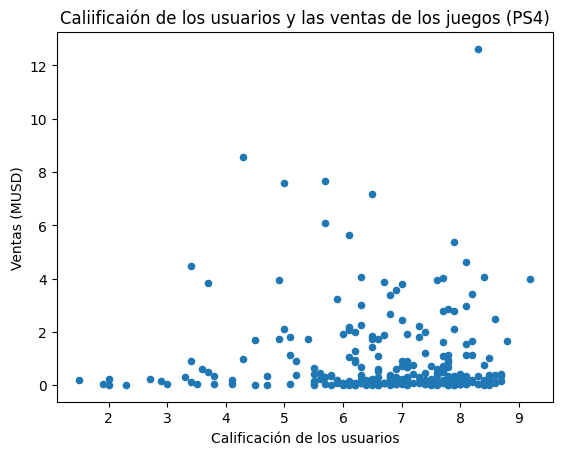

El coeficiente de correlación es de:
-0.031957110204556376


In [23]:
# Creación del diagrama de dispersión con valores de la crítica de los usuarios
PS4_df.plot(x='user_score', y='total_sales', kind='scatter', title='Caliificaión de los usuarios y las ventas de los juegos (PS4)')
plt.xlabel('Calificación de los usuarios')
plt.ylabel('Ventas (MUSD)')
plt.show()

# Coeficiente de correlación
print('El coeficiente de correlación es de:')
print(PS4_df['user_score'].corr(PS4_df['total_sales']))

Conclusiones:

* La calificación de la crítica hecha por profesionales y las ventas tienen un coeficiente de correlación de 0.40, esto representa una correlación postiva y se puede ver claramente en la gráfica, cuanto mayor sea la calificación que tiene el juego tiene más probabilidades de que se venda más.

* Por otro lado, el coeficiente de correlación entre la calificación de los usuarios y las ventas es muy cercano a 0.0; por lo que no tienen una correlación lineal. Además se puede observar en la gráfica que no importa mucho la calificaión que le den los usuarios al juego, este tal vez aún se venda bien.

Los gustos de juegos entre los usuarios es variada y muy probablemente los usuarios no tomen en cuenta la calificaicón de otro usuario para tomar una desición al comprar un juego. Pero, si la calificación proviene de un profesional, es más probable que los usuarios consideren comprar el juego o no de acuerdo a la calificación que tenga.

### 2.7 Mismos juegos, diferentes plataformas

Aunque los juegos pueden salir para diferentes plataformas, ¿hay más ventas del mismo juego en un plataforma que en otra?

Para crear un análisis para los mismos juegos que hay en las diferentes plataformas primero es necesario saber cuáles son esos juegos y para qué plataformas se encuentran disponibles.

Se sabe que la PS4 y el XOne ha tenido un incremento de ventas de juegos desde el 2013 (año de lanzamiento de ambas plataformas) y por lo tanto, siguen estando vigentes en el mercado. Además ambas plataformas tienen un IQR muy similiar. Debido estas razones y por motivos de simplicidad se evaluaran sólo los juegos que comparten estas dos plataformas.

Para lograr este análisis se realizará lo siguiente:
1. Primero se creará un DataFrame que contendrá los valores de las dos plataformas antes mencionadas
2. Se realizará un segundo DataFrame con los nombres de todos los juegos que comparten las plataformas
3. Se filtrará el primer DataFrame de acuerdo a los valores del segundo, de esta forma solo estarán los juegos que comparten las plataformas
4. Se hace una gráfica sumando las ventas totales de los juegos que hay en cada plataforma

In [24]:
# Se filtra el dataframe para las plataformas PS4 y XOne
PS4_XOne_games = last_5_years[last_5_years['platform'].isin(['PS4', 'XOne'])]

# DF con los nombres que comparten dichas plataformas
names = PS4_XOne_games['name'].value_counts(ascending=False)
names = names[names > 1]
names = names.reset_index()
display(names)

,name,count
0,Call of Duty: Black Ops 3,2
1,Battleborn,2
2,Mirror's Edge Catalyst,2
3,TrackMania Turbo,2
4,Dead or Alive 5,2
...,...,...
212,LEGO Jurassic World,2
213,Madden NFL 15,2
214,Rayman Legends,2
215,Final Fantasy Type-0,2


Text(0, 0.5, 'Ventas Totales (MUSD)')

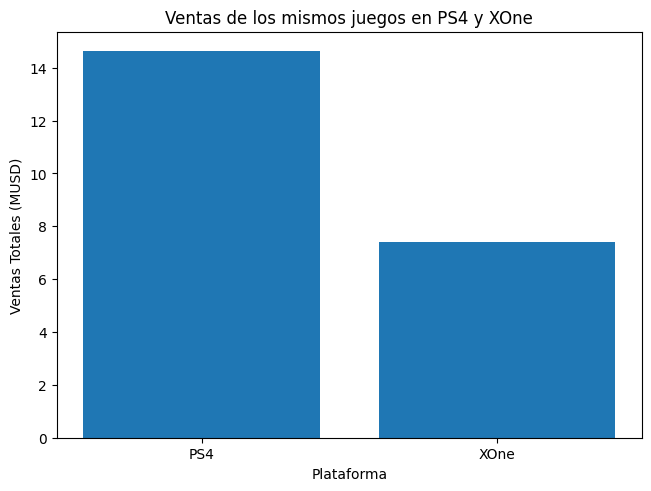

In [25]:
# Filtrar PS4_XOne_games por los nombres del anterior DF
PS4_XOne_games = PS4_XOne_games[PS4_XOne_games['name'].isin(names['name'])]

# Graficar el total de las ventas de cada plataforma
fig, ax = plt.subplots(layout='constrained')
ax.bar('platform', 'total_sales', data=PS4_XOne_games, width=0.8)
ax.set_title('Ventas de los mismos juegos en PS4 y XOne')
ax.set_xlabel('Plataforma')
ax.set_ylabel('Ventas Totales (MUSD)')

Conclusiones:

Las ventas de PS4 son alrededor del doble en comparación con XOne, en los juegos que comparten las dos plataformas

### 2.8 Ventas de juegos por género

¿Hay un tipo de género que sea más rentable? Para responder esto es necesario realizar un análisis general sobre las ventas de los juegos de acuerdo al género

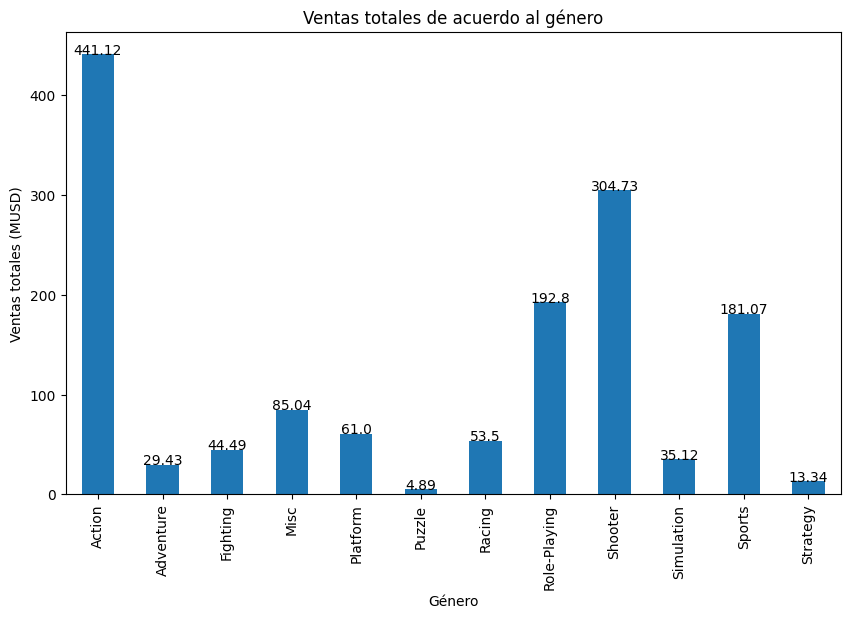

In [26]:
# Se agrupa de acuerdo al género, sumando las ventas totales
sales_by_genre = last_5_years.groupby('genre')['total_sales'].sum()

# Gráfica
sales_by_genre.plot(kind='bar', figsize=(10,6), title='Ventas totales de acuerdo al género')
for i, v in enumerate(sales_by_genre):
    plt.text(i, v, str(round(v,2)), ha='center')

plt.xlabel('Género')
plt.ylabel('Ventas totales (MUSD)')
plt.show()

Conclusiones:

El género que más juegos vende es el de Action, seguido por el Shooter, Role_Playing y Sports. Con esto podemos decir que estos son los géneros principales de manera general, los usuarios compran mucho menos juegos de otro tipo de género.

El género menos preferido por los usuarios es el de Puzzle, ya que tiene menos de 5 millones de dólares en ventas durante 5 años.

## 3. Perfil de usuario de acuerdo a la región

En el DataFrame están las ventas de 3 regiones: Norteamérica, Europa y Japón. En estas se pueden realizar diferentes análisis como los que se realizan a continuación.

Para los siguientes análisis se sigue utilizando el DataFrame `last_5_years`, que sólo contiene la información de los juegos lanzados en los últimos 5 años 

### 3.1 Plataformas principales para cada región



¿Existe alguna plataforma diferente a la PS4 que sea líder en ventas en alguna región? Para dar respuesta se realizará un análisis para cada región, además podremos saber si hay variaciones en las cuotas entre un mercado y otro.

In [27]:
# Agrupa por plataforma sumando las ventas de las 3 regiones
agg_dict = {'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}
regions_sales = last_5_years.groupby('platform').agg(agg_dict)
display(regions_sales.head(5))

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
DS,4.59,3.53,3.72
PC,19.12,37.76,0.00
PS3,103.38,106.86,35.29
PS4,108.74,141.09,15.96


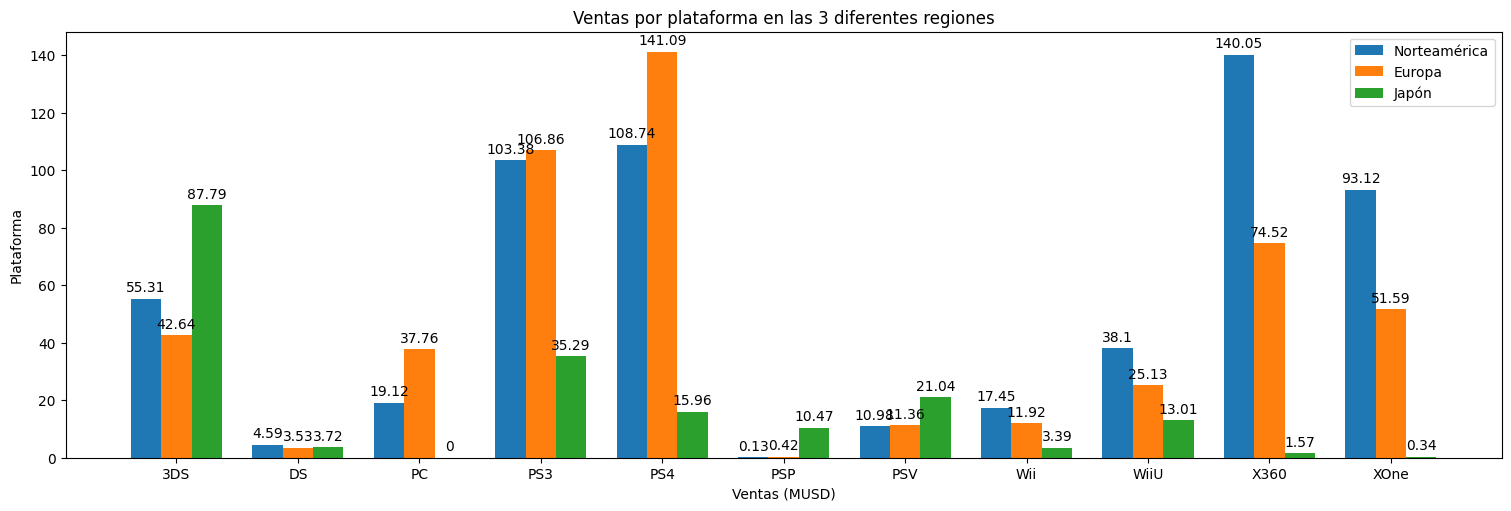

In [28]:
# Creación de la gráfica de barras para las tres regiones

# Se declaran los valores de la localización de las barras y el ancho
x = np.arange(len(regions_sales))
width = 0.25

# Se crea el gráfico
fig, ax = plt.subplots(figsize=(15,5), layout='constrained')
nort = ax.bar(x - width, regions_sales['na_sales'], width, label='Norteamérica')
eu = ax.bar(x, regions_sales['eu_sales'], width, label='Europa')
jap = ax.bar(x + width, regions_sales['jp_sales'], width, label='Japón')

# Se colocan las etiquetas con el valor de cada barra
ax.bar_label(nort, padding=3)
ax.bar_label(eu, padding=3)
ax.bar_label(jap, padding=3)

# Se colocan etiquetas al gráfico
ax.set_title('Ventas por plataforma en las 3 diferentes regiones')
ax.set_xticks(x)
ax.set_xticklabels(regions_sales.index)
ax.set_ylabel('Plataforma')
ax.set_xlabel('Ventas (MUSD)')
plt.legend()
plt.show()

Conclusiones:

* La PS4 y PS3 son los líderes de ventas en Europa.
* El X360 y XOne son líederes de ventas en Norteamérica
* Y el 3DS es la única plataforma que es líder de ventas en Japón

Se puede decir que los usuarios de norteamérica prefieren una XOne o X360 a cualquier otra plataforma, de igual manera spuede decir que los usuarios de Europa prefieren comprar un PS4 o PS3. Los japoneses prefiren comprar un 3DS, lo cual suena lógico ya que Nintendo es japonés.

### 3.2 Géneros principales para cada región

Así como se hizo el previo análisis, ¿existe un género preferido para cada región?

In [29]:
# Agrupa por genero sumando las ventas de las 3 regiones
regions_sales_genre = last_5_years.groupby('genre').agg(agg_dict)
display(regions_sales_genre.head(5))

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63


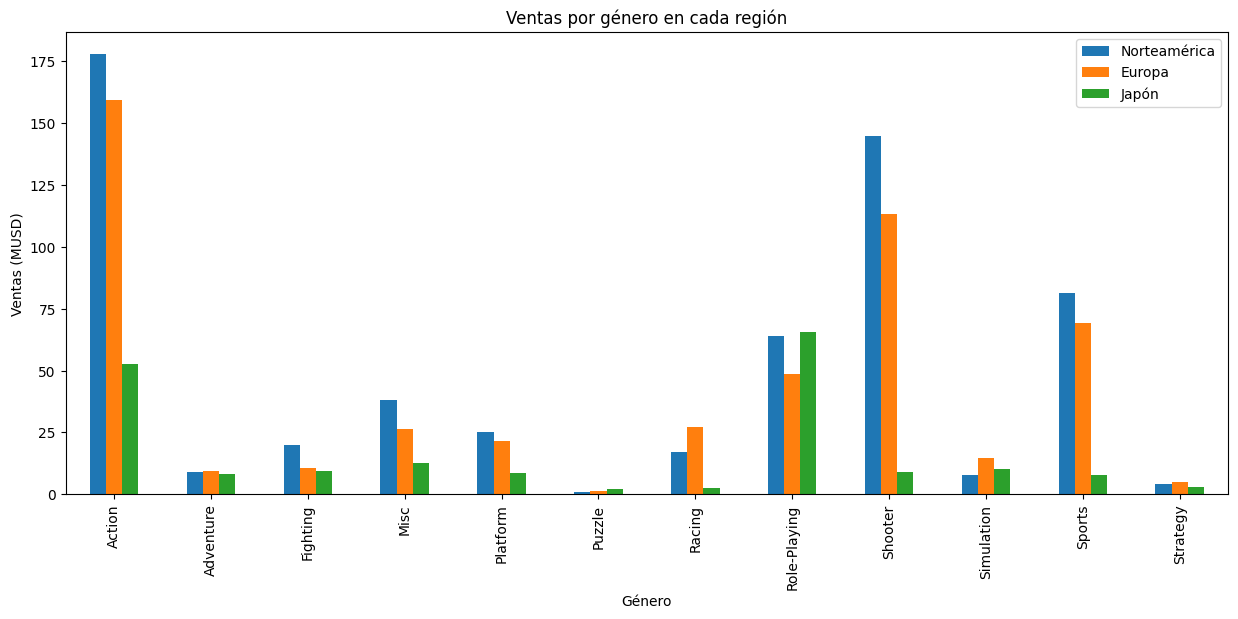

In [30]:
# Crear gráfica
regions_sales_genre.plot(kind='bar', title='Ventas por género en cada región', figsize=(15,6))
plt.xlabel('Género')
plt.ylabel('Ventas (MUSD)')
plt.legend(['Norteamérica', 'Europa', 'Japón'])
plt.show()

Conclusiones:

Los usuarios de Norteamérica y Europa tienen gran preferencia por los juegos cuyos géneros son: Action, Shooter y Sports. Además se observa que alguna de estás regiones es líder en ventas en casi todo los géneros, excepto por el Role-Playing, el cuál los usuarios japoneses prefieren por sobre los demás géneros, ya es el género por el que los usuarios gastan más su dinero. 

### 3.3 Clasificaciones de los juegos

¿Es posible que las clasificaciones tengan que ver con las compras en las diferentes regiones? Por ejemplo, ¿una clasificación ESRB tiene menos ventas en una región?

In [31]:
# Agrupa por genero sumando las ventas de las 3 regiones
regions_sales_rating = last_5_years.groupby('rating').agg(agg_dict)
display(regions_sales_rating.head(5))

,na_sales,eu_sales,jp_sales
rating,,,
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02
no rating,103.31,91.50,108.84


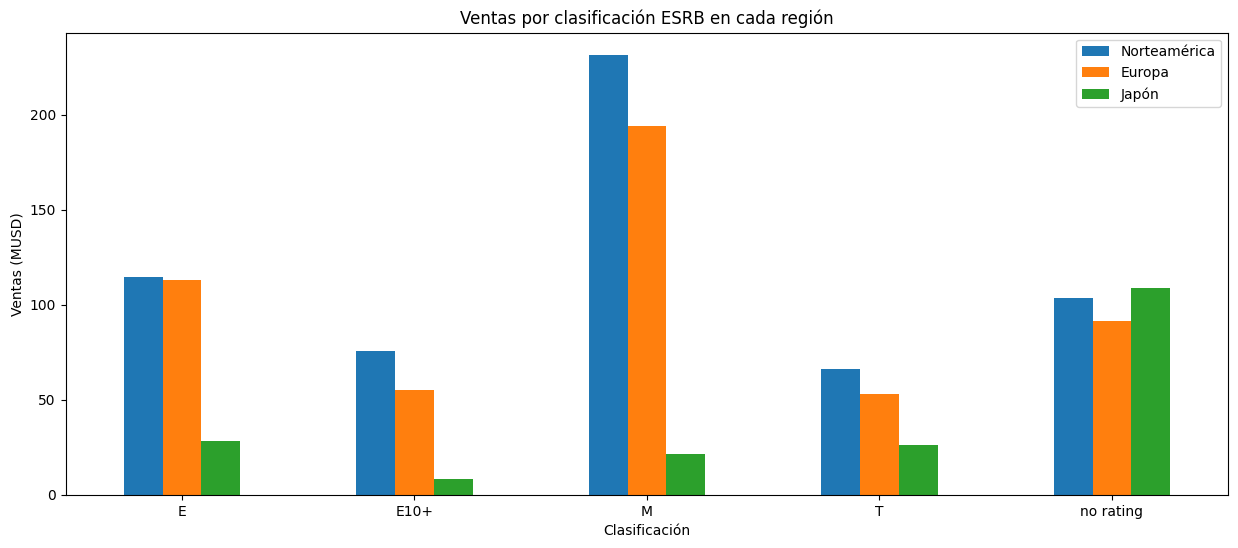

In [32]:
# Crear gráfica
regions_sales_rating.plot(kind='bar', title='Ventas por clasificación ESRB en cada región', figsize=(15,6))
plt.xlabel('Clasificación')
plt.ylabel('Ventas (MUSD)')
plt.legend(['Norteamérica', 'Europa', 'Japón'])
plt.xticks(rotation=0)
plt.show()

Conclusiones:

Los usuarios de Norteamérica y de Europa son los que más compran juegos independientemente de la clasificación. De las clasificaciones, La clasificación M es la que genera más ventas, con esto se puede decir que los usuarios que compran estos juegos tienen 17 años o más.

## 4. Pureba de hipótesis

Para la prueba de hipótesis se fija el valor alpha en 0.05 para que el umbral se pequeño

4.1 Hipótesis 1

* Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox y PC no son iguales

In [33]:
# Se establece alpha en 0.05
alpha = 0.05
sample_1 = last_5_years[last_5_years['platform'] == 'XOne']['user_score']
sample_1 = sample_1.dropna()
sample_2 = last_5_years[last_5_years['platform'] == 'PC']['user_score']
sample_2 = sample_2.dropna()
results = st.ttest_ind(sample_1, sample_2)
print('Valor p:', results.pvalue)

if(results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.5535080500643661
No podemos rechazar la hipótesis nula


La hipótesis alternativa se formuló con base a la hipótesis nula, poniendo lo contrario a lo que se propone en la hipóteisis nula

Conclusión:

Nuestro análisis sugiere que las calificaciones de los usuarios no difieren entre la XOne y la PC

### 4.2 Hipótesis 2

* Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
* Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [34]:
sample_1 = last_5_years[last_5_years['genre'] == 'Action']['user_score']
sample_1 = sample_1.dropna()
sample_2 = last_5_years[last_5_years['genre'] == 'Sports']['user_score']
sample_2 = sample_2.dropna()
results = st.ttest_ind(sample_1, sample_2)
print('Valor p:', results.pvalue)

if(results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 3.716308946093486e-26
Rechazamos la hipótesis nula


La hipótesis nula se formuló con el criterio de que n hay diferencia entre los dos grupos.

Conclusión:

Nuestro análisis sugiere que las calificaciones de los usuarios si difieren entre los géneros de Acción y Deportes

## 5. Conclusión General

Este fue un excelente proyecto para poner en práctica todo lo que se ha aprendido en el curso. Pude poner en práctica muchos conceptos que se han visto durante el BootCamp y muchos otros que investigué en otros medios, como los docs de las diferentes librearias que se utilizaron para la elaboración del proyecto

Me gusto mucho este reto porque todo lo tuve que hacer desde cero, la única ayuda que hubo fue la pequeña guía de la página de TripleTen. Todo el código lo tuve que hacer por mi cuenta.

Espero resivir los comentarios que tenga el revisor para poder corregir y hacer más eficiente mi código